In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/outlier_detection_assignment_data.csv')
print(data.head())

   ID  variable
0   1         0
1   2         0
2   3         2
3   4         0
4   5         0


In [ ]:
print(data.isnull().sum())

ID          0
variable    0
dtype: int64


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ID        10080 non-null  int64
 1   variable  10080 non-null  int64
dtypes: int64(2)
memory usage: 157.6 KB
None


After reading the data it is split into training and test data. The training data consists of values for 6 days of week, while the test data contains values for the seventh day of the week.

In [ ]:
train_data = data[0:9360]
print(train_data)

        ID  variable
0        1         0
1        2         0
2        3         2
3        4         0
4        5         0
...    ...       ...
9355  9356         0
9356  9357         3
9357  9358         0
9358  9359         0
9359  9360         0

[9360 rows x 2 columns]


In [ ]:
test_data = data[9360:]
print(test_data)

          ID  variable
9360    9361         0
9361    9362         0
9362    9363         0
9363    9364         0
9364    9365         0
...      ...       ...
10075  10076         0
10076  10077         2
10077  10078         0
10078  10079         9
10079  10080         0

[720 rows x 2 columns]


After splitting the data into training and the test data set, a bit of shuffling is done so as to enhance the detection approach.

In [ ]:
train_data = train_data.sample(frac=1).reset_index(drop=True)

In [ ]:
test_data = test_data.sample(frac=1).reset_index(drop=True)

In [ ]:
print(train_data)

        ID  variable
0     8385         0
1     3743         0
2     1654         0
3     9122         0
4     7968         3
...    ...       ...
9355  8925         0
9356  5725         0
9357  5051         0
9358  8941         0
9359  2191         0

[9360 rows x 2 columns]


In [ ]:
print(test_data)

       ID  variable
0    9769         9
1    9710        47
2    9484         0
3    9699        22
4    9418         0
..    ...       ...
715  9909         0
716  9487         0
717  9677         0
718  9714        26
719  9837         1

[720 rows x 2 columns]


For outlier detection using Machine learning for the given data, four different algorithms have been used. They are :
1. Isolation Forest
2. Elliptic Envelope
3. Local Outlier Factor
4. One-class SVM

Isolation Forests(IF), similar to Random Forests, are build based on decision trees. And since there are no pre-defined labels here, it is an unsupervised model.

In an Isolation Forest, randomly sub-sampled data is processed in a tree structure based on randomly selected features. The samples that travel deeper into the tree are less likely to be anomalies as they required more cuts to isolate them. Similarly, the samples which end up in shorter branches indicate anomalies as it was easier for the tree to separate them from other observations.

The algorithm returns values {1,-1}, where 1 denotes inlier and -1 denotes outlier present in the data set.

Here, the variable yhat_iso predicts the outliers present in test data using isolation forest algorithm.

In [ ]:
iso = IsolationForest(contamination=0.1)
iso.fit(train_data)
yhat_iso = iso.predict(test_data)
print(yhat_iso)

In elliptic envelope algorithm,the model converts the data into elliptical shape and the points which are far away from this shape coordinates are considered outliers and for this minimum-covariance- determinant is found out. It is like when finding the covariance in the dataset so that minimum is excluded and which is higher those points are considered anomalies.

The variable yhat_ee defines the predictions for elliptic envelope algorithm on the test data.

In [ ]:
ee = EllipticEnvelope(contamination=0.01)
ee.fit(train_data)
yhat_ee = ee.predict(test_data)
print(yhat_ee)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

Local Outlier Factor is also an unsupervised algorithm and it is not tree-based than a density-based algorithm like KNN, Kmeans. When any data point is taken into account as an outlier depending upon its local neighborhood, it’s a local outlier. LOF will identify an outlier considering the density of the neighbor. LOF performs well when the density of the data point isn’t constant throughout the dataset.

Again,the values returned by the algorithm are {1,-1} where 1 denotes inlier where as -1 denotes outlier in the data set.

Here, yhat_lof is the prediction of Local Outlier Factor algorithm on the test data.

In [ ]:
lof = LocalOutlierFactor(novelty=True)
lof.fit(train_data)
yhat_lof = lof.predict(test_data)
print(yhat_lof)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  "X does not have valid feature names, but"


One-class SVMs are a special type of support vector machine. First, data is modeled and the algorithm is trained. Then when new data are encountered their position relative to the normal data (or inliers) from training can be used to determine whether it is out of class or not. As they can be trained with unlabelled data or without target variables in it they are an example of unsupervised machine learning.

Here, yhat_svm defines the predictions of One-class SVM on the test data. The values are either 1 or -1, where 1 denotes inlier and -1 denotes outlier present in the data set.

In [ ]:
svm = OneClassSVM(nu=0.01)
svm.fit(train_data)
yhat_svm = svm.predict(test_data)
print(yhat_svm)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

Next, we try to mask those values which are inliers or whose values are equal to 1. This helps in defining the outliers present in the test data.

Here, mask_iso identifies those values predicted from isolation forest which are outliers.

In [ ]:
mask_iso = yhat_iso == -1

Test_data_iso are those values in test dataset which are outliers as predicted by isolation forest algorithm.

In [ ]:
test_data_iso = test_data[mask_iso]
print(test_data_iso)

       ID  variable
0    9769         9
1    9710        47
3    9699        22
7    9919         2
9    9938         2
..    ...       ...
709  9629         4
711  9961         2
714  9931         2
718  9714        26
719  9837         1

[356 rows x 2 columns]


The above approach is repeated for elliptic envelope, local outlier factor and One-class SVM respectively.

In [ ]:
mask_ee = yhat_ee == -1

In [ ]:
test_data_ee = test_data[mask_ee]
print(test_data_ee)

       ID  variable
0    9769         9
1    9710        47
2    9484         0
3    9699        22
4    9418         0
..    ...       ...
715  9909         0
716  9487         0
717  9677         0
718  9714        26
719  9837         1

[720 rows x 2 columns]


In [ ]:
mask_lof = yhat_lof == -1

In [ ]:
test_data_lof = test_data[mask_lof]
print(test_data_lof)

       ID  variable
0    9769         9
1    9710        47
2    9484         0
3    9699        22
4    9418         0
..    ...       ...
715  9909         0
716  9487         0
717  9677         0
718  9714        26
719  9837         1

[715 rows x 2 columns]


In [ ]:
mask_svm = yhat_svm == -1

In [ ]:
test_data_svm = test_data[mask_svm]
print(test_data_svm)

       ID  variable
0    9769         9
1    9710        47
2    9484         0
3    9699        22
4    9418         0
..    ...       ...
715  9909         0
716  9487         0
717  9677         0
718  9714        26
719  9837         1

[720 rows x 2 columns]


Upon analysing the size of predicted test data values, it was found that elliptic envelope and One-class SVM predicted all the values in test dataset as outliers. Whereas,local outlier factoridentified almost 99.3% of the test data as outliers.

It was isolation forest itself which identified almost 49% of the values in test dataset. Henceforth, for our case, isolation forest could be considered an optimal algorithm for outlier detection using machine learning.

The below plot is a visualization of test dataset. This clearly helps in defining that there are values which are away from the commonly observed value of the variable i.e. 0. Again, which values should be termed as outliers also depends on what range of values for the variable is considered to be optimal.

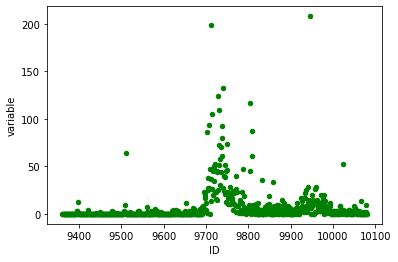

In [ ]:
test_data.plot(kind = 'scatter',x = 'ID',y = 'variable',alpha = 1, color = 'green')